In [1]:
import numpy as np 
import pandas as pd
import re # Importation de la bibiliothèque Regular Experession for Cleaning process
import nltk # Importation de la bibliothèque NLTK: stop words, cleaning tokenization, stemming, Lemmatization, etc. 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
airline_tweets.head()

tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]

In [ ]:
#airline_tweets.describe()

tweet_id  ...  retweet_count
count  1.464000e+04  ...   14640.000000
mean   5.692184e+17  ...       0.082650
std    7.791112e+14  ...       0.745778
min    5.675883e+17  ...       0.000000
25%    5.685592e+17  ...       0.000000
50%    5.694779e+17  ...       0.000000
75%    5.698905e+17  ...       0.000000
max    5.703106e+17  ...      44.000000

[8 rows x 4 columns]

In [ ]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plot_size[0] = 14
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


In [ ]:
airline_tweets['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
count=airline_tweets.airline.value_counts()

In [ ]:
print(count)

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


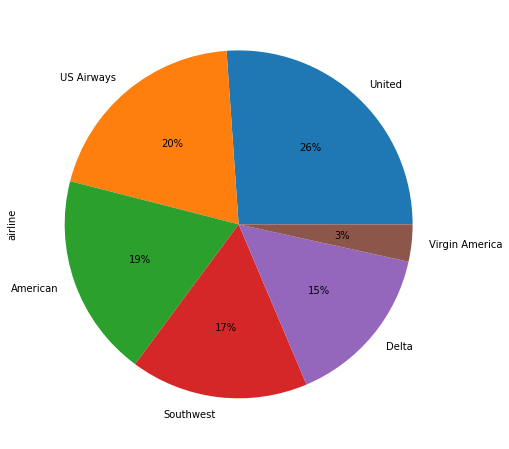

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
# Cette figure représente la répartition des données par compagines aériennes 

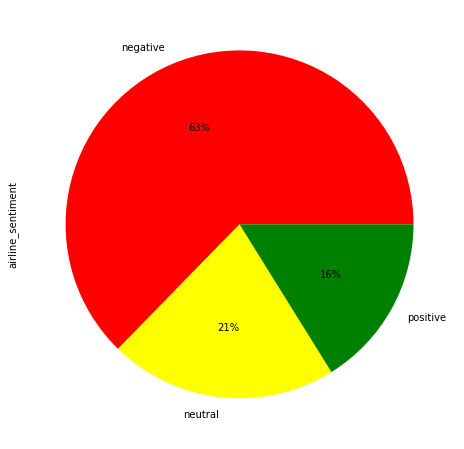

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

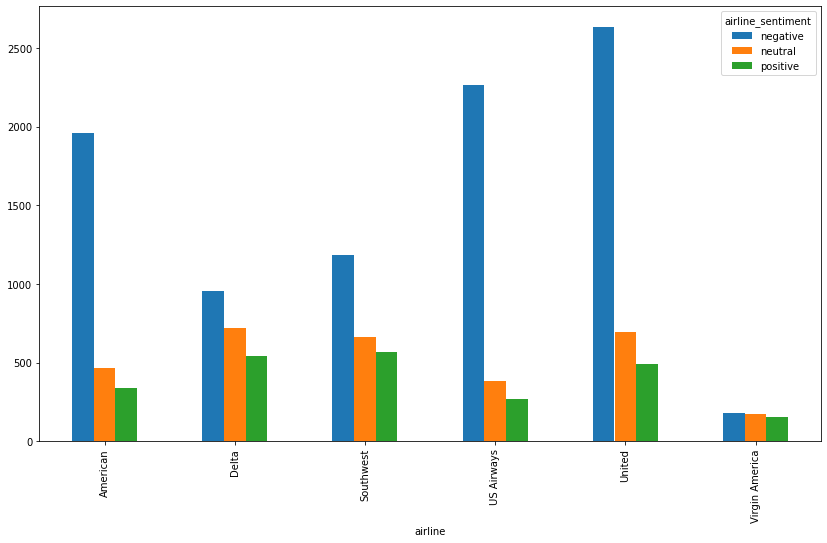

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [ ]:
features = airline_tweets.iloc[:, 10].values # Text shared
labels = airline_tweets.iloc[:, 1].values # Airline Sentiment (Neutral, Negative & Positive)
print(features)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
tidy_features = []

In [ ]:
print ("****** Features ********")
print(features)
for sentence in range(0, len(features)):
  # Remove all the special characters
  tidy_feature = re.sub(r'\W', ' ', str(features[sentence]))
  # remove all single characters: espace + Charcater + Espace Bonjour a my
  tidy_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', tidy_feature)
  # remove all single characters: espace + Charcater + Espace Bonjour a my
  tidy_feature= re.sub(r'\s+[^0-9]\s+', ' ', tidy_feature)
  # Substituting multiple spaces with single space
  tidy_feature = re.sub(r'\s+', ' ', tidy_feature, flags=re.I)
  # Subtituting a prefexied @ with ''
  tidy_feature = re.sub(r'^@\s+', '', tidy_feature)
  # Subtituting a prefexied @ with ''
  tidy_feature = re.sub(r'\d+', '', tidy_feature)
  tidy_feature = tidy_feature.lower()
  tidy_features.append(tidy_feature)

print ("****** Tidy Features ********")
print(tidy_features)

****** Features ********
['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']
****** Tidy Features ********
[' virginamerica what dhepburn said ', ' virginamerica plus you ve added commercials to the experience tacky ', ' virginamerica didn today must mean need to take another trip ', ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse', ' virginamerica and it a really big bad thing about it', ' virginamerica seriously would pay  flight for

In [ ]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
numerical_tidy_features = vectorizer.fit_transform(tidy_features).toarray()
print(numerical_tidy_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numerical_tidy_features, labels, test_size=0.2, random_state=0)

In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.svm import SVC
text_classifier = SVC(kernel='rbf')
text_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[609 452 809]
 [ 62 207 345]
 [ 26  52 366]]
              precision    recall  f1-score   support

    negative       0.87      0.33      0.47      1870
     neutral       0.29      0.34      0.31       614
    positive       0.24      0.82      0.37       444

    accuracy                           0.40      2928
   macro avg       0.47      0.50      0.39      2928
weighted avg       0.66      0.40      0.43      2928

0.4036885245901639
